In [1]:
#import library penting
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
#load dataset
data = pd.read_csv('Stroke Dataset.csv')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
data.gender.fillna('Unknown', inplace=True)
data.gender = data.gender.astype('category').cat.as_ordered()
data.ever_married.fillna('Unknown', inplace=True)
data.ever_married = data.ever_married.astype('category').cat.as_ordered()
data.work_type.fillna('Unknown', inplace=True)
data.work_type = data.work_type.astype('category').cat.as_ordered()
data.Residence_type.fillna('Unknown', inplace=True)
data.Residence_type = data.Residence_type.astype('category').cat.as_ordered()
data.smoking_status.fillna('Unknown', inplace=True)
data.smoking_status = data.smoking_status.astype('category').cat.as_ordered()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 5110 non-null   int64   
 1   gender             5110 non-null   category
 2   age                5110 non-null   float64 
 3   hypertension       5110 non-null   int64   
 4   heart_disease      5110 non-null   int64   
 5   ever_married       5110 non-null   category
 6   work_type          5110 non-null   category
 7   Residence_type     5110 non-null   category
 8   avg_glucose_level  5110 non-null   float64 
 9   bmi                4909 non-null   float64 
 10  smoking_status     5110 non-null   category
 11  stroke             5110 non-null   int64   
dtypes: category(5), float64(3), int64(4)
memory usage: 305.3 KB


In [4]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
#cek jumlah data dan kolom nya
data.shape

(5110, 12)

# Step EDA

In [6]:
#cek data kosong
data.isnull().values.any()

True

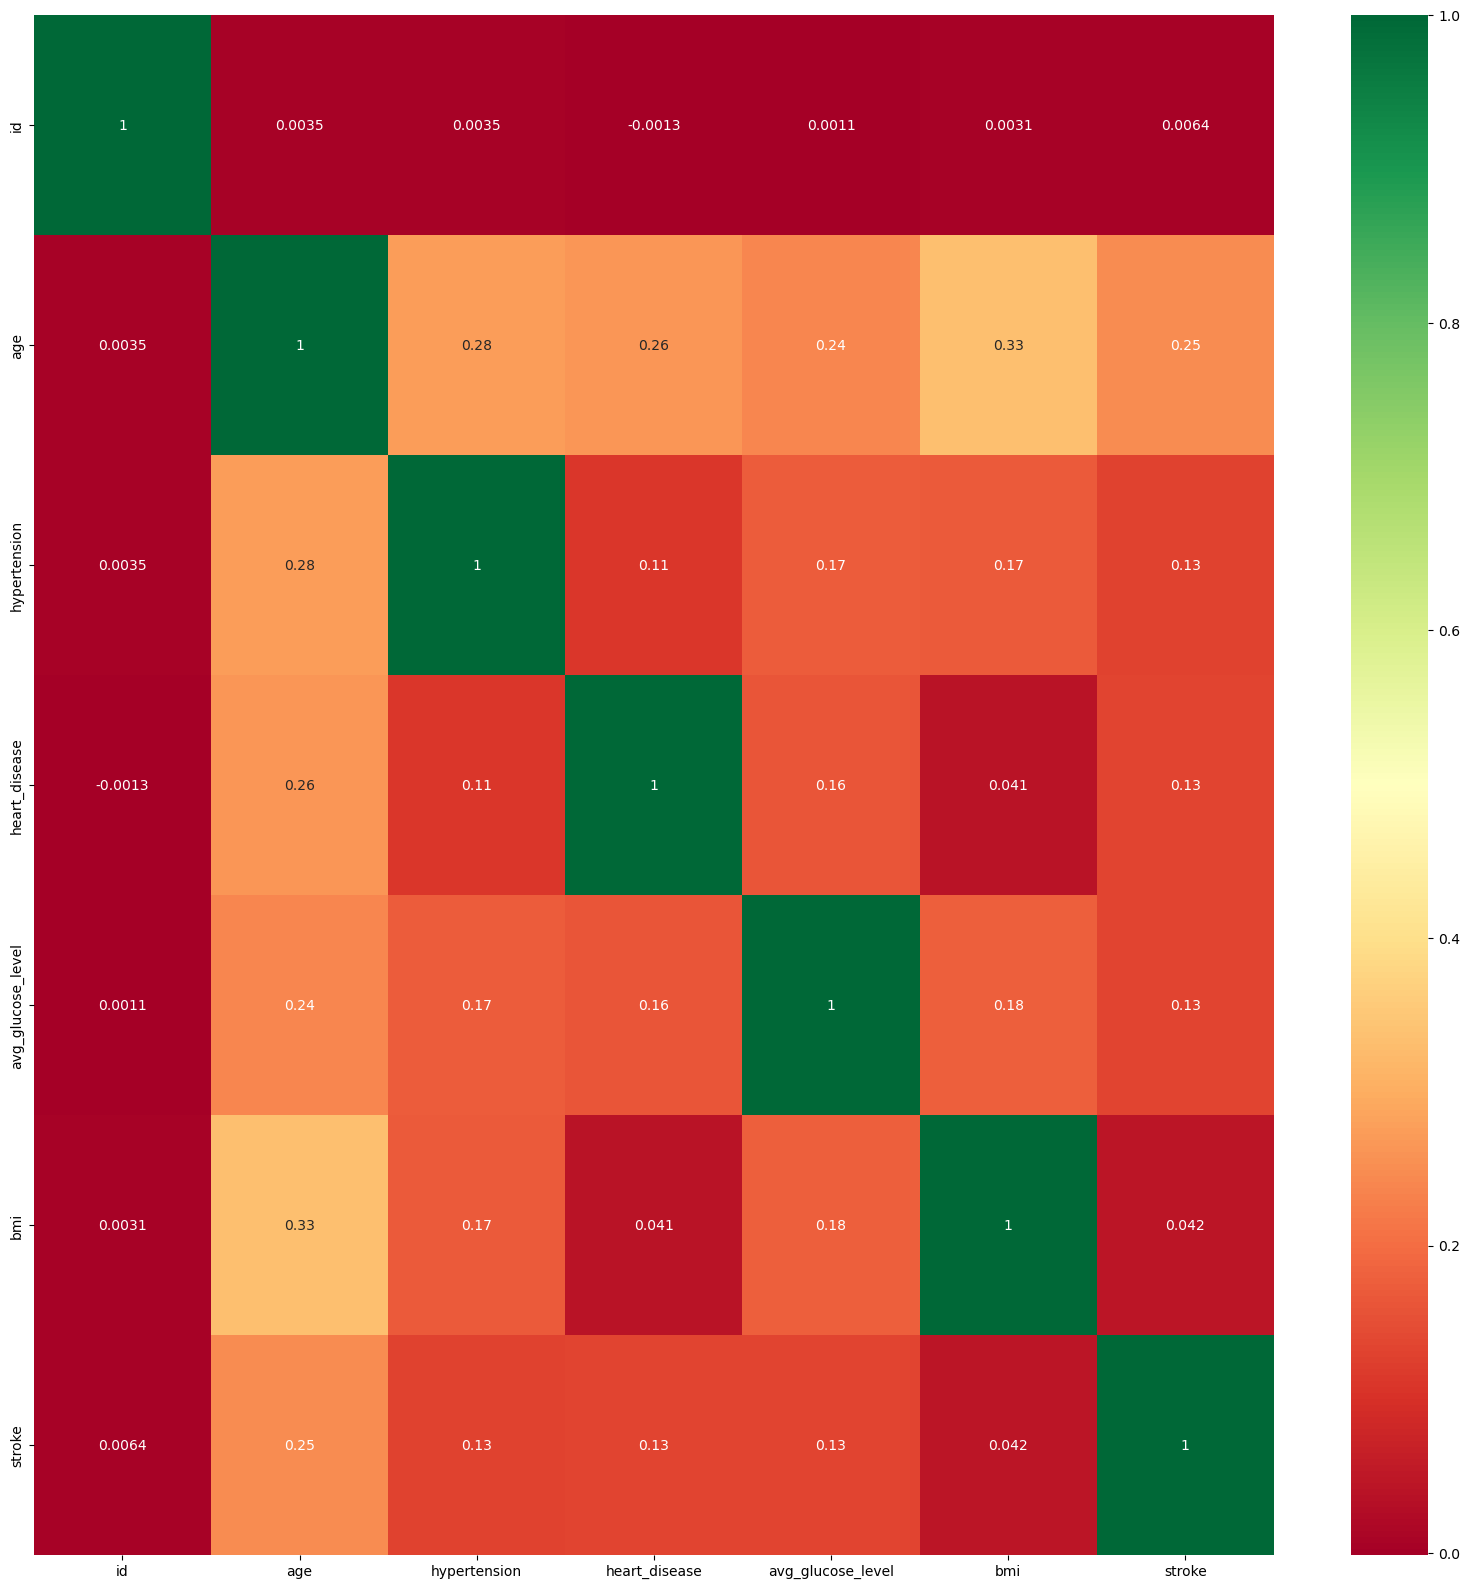

In [7]:
#korelasi menggunakan heat map
import seaborn as sns
data = data.select_dtypes(include=['float64', 'int64'])
korelasi = data.corr()
features = korelasi.index
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(data[features].corr(),annot=True,cmap="RdYlGn")

In [8]:
#show corelation in tables
data.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


In [9]:
#statistika dasar
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [10]:
#chechking skewness dari data
stroke_true_count =len(data.loc[data['stroke']==1])
stroke_false_count =len(data.loc[data['stroke']==0])

In [11]:
#view
(stroke_true_count,stroke_false_count)

(249, 4861)

In [12]:
#Missing value
print('total number of rows : {0}'.format(data.shape[0]))
print('total number of colums : {0}'.format(data.shape[1]))

total number of rows : 5110
total number of colums : 7


In [13]:
data.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')

In [14]:
print('Banyak baris nilai nol untuk id : {0}'.format(len(data.loc[data['id']==0])))
print('Banyak baris nilai nol untuk age : {0}'.format(len(data.loc[data['age']==0])))
print('Banyak baris nilai nol untuk hypertension : {0}'.format(len(data.loc[data['hypertension']==0])))
print('Banyak baris nilai nol untuk heart_disease : {0}'.format(len(data.loc[data['heart_disease']==0])))
print('Banyak baris nilai nol untuk avg_glucose_level : {0}'.format(len(data.loc[data['avg_glucose_level']==0])))
print('Banyak baris nilai nol untuk bmi : {0}'.format(len(data.loc[data['bmi']==0])))

Banyak baris nilai nol untuk id : 0
Banyak baris nilai nol untuk age : 0
Banyak baris nilai nol untuk hypertension : 4612
Banyak baris nilai nol untuk heart_disease : 4834
Banyak baris nilai nol untuk avg_glucose_level : 0
Banyak baris nilai nol untuk bmi : 0


In [15]:
data2 = data.copy()

In [16]:
#Rata-rata
avg_hypertension  = data2['hypertension'].mean()
avg_heart_disease = data2['heart_disease'].mean()
avg_stroke = data2['stroke'].mean()


In [17]:
#now replace avg to columns
data2['hypertension'].replace({0:avg_hypertension }, inplace=True)
data2['heart_disease'].replace({0:avg_heart_disease }, inplace=True)


In [18]:
print('Banyak baris nilai nol untuk id : {0}'.format(len(data2.loc[data2['id']==0])))
print('Banyak baris nilai nol untuk age : {0}'.format(len(data2.loc[data2['age']==0])))
print('Banyak baris nilai nol untuk hypertension : {0}'.format(len(data2.loc[data2['hypertension']==0])))
print('Banyak baris nilai nol untuk heart_disease : {0}'.format(len(data2.loc[data2['heart_disease']==0])))
print('Banyak baris nilai nol untuk avg_glucose_level : {0}'.format(len(data2.loc[data2['avg_glucose_level']==0])))
print('Banyak baris nilai nol untuk bmi : {0}'.format(len(data2.loc[data2['bmi']==0])))


Banyak baris nilai nol untuk id : 0
Banyak baris nilai nol untuk age : 0
Banyak baris nilai nol untuk hypertension : 0
Banyak baris nilai nol untuk heart_disease : 0
Banyak baris nilai nol untuk avg_glucose_level : 0
Banyak baris nilai nol untuk bmi : 0


C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_10716\96692473.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


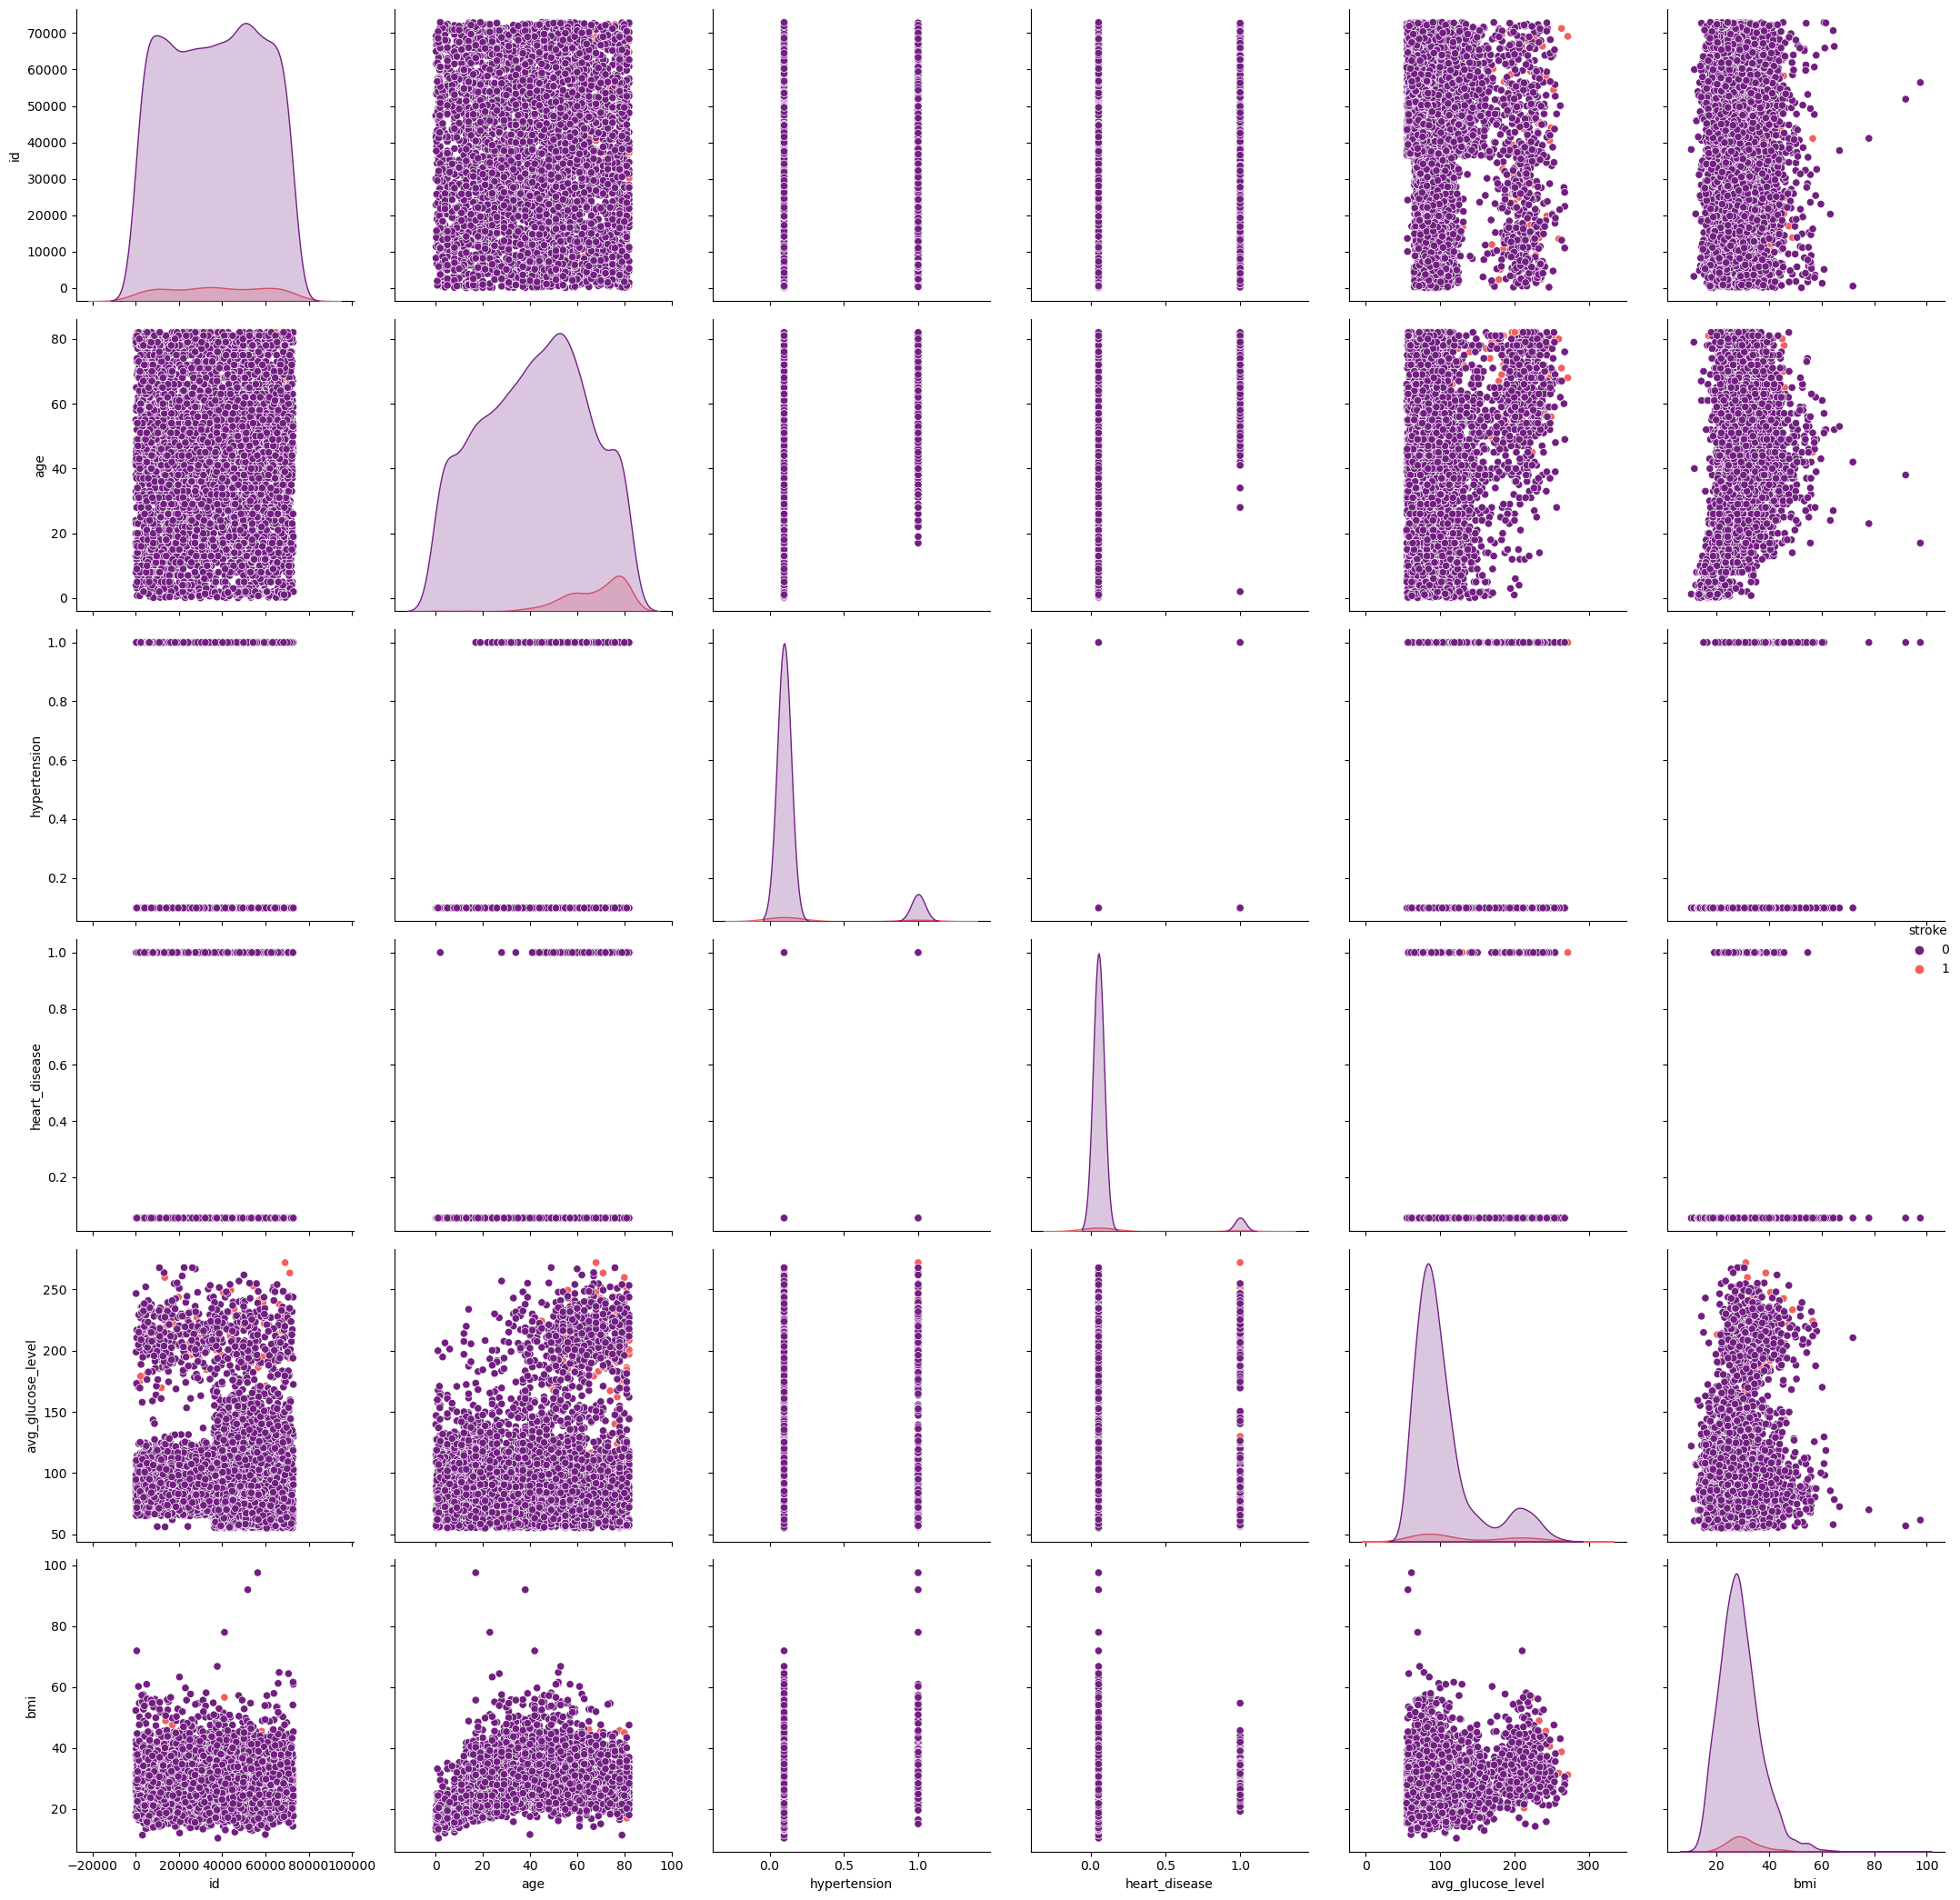

In [19]:
#make pairplot
sns.pairplot(data2,hue='stroke',palette='magma', height = 3.5)
plt.tight_layout()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10716\1338979606.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


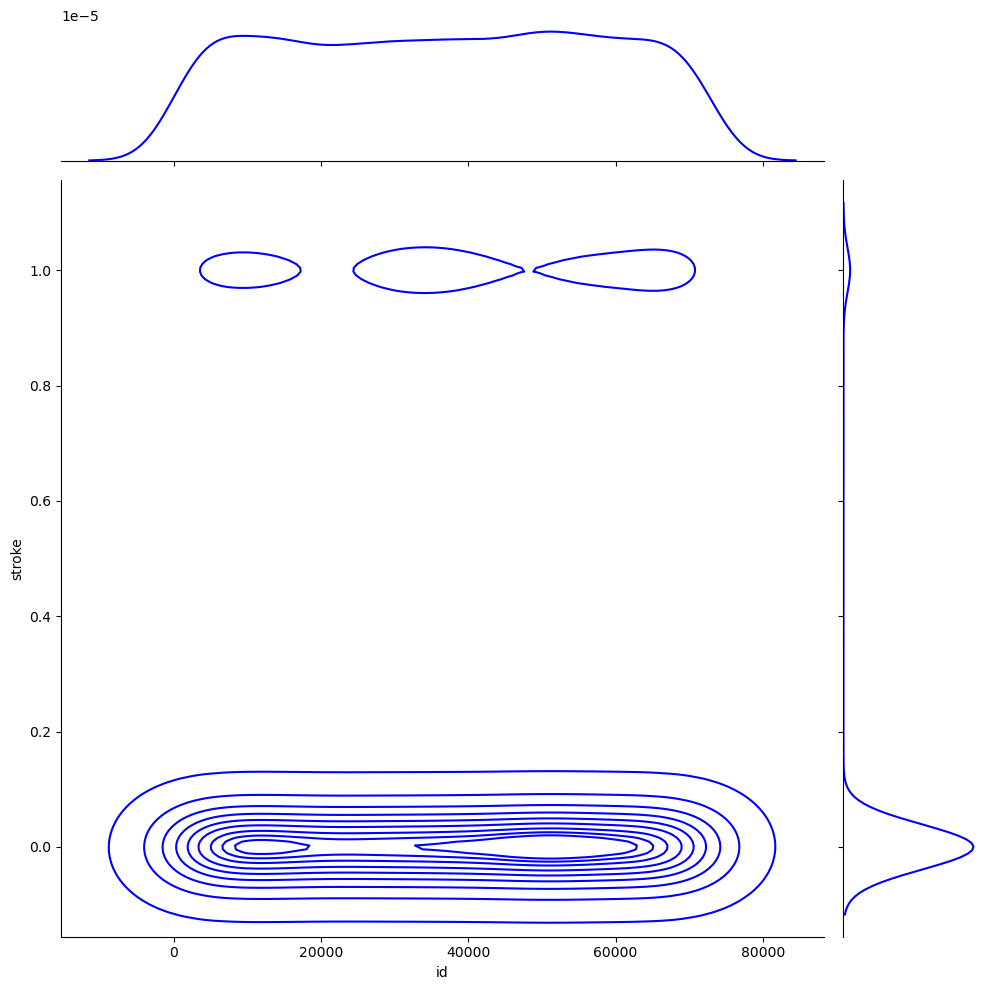

In [20]:
#joinplot
sns.jointplot(x='id', y='stroke', data=data2,height=10,kind='kde',color='blue')
plt.tight_layout()

## Aplly Model

In [21]:
from sklearn.model_selection import train_test_split

x = data2.drop('stroke', axis=1)
y = data2['stroke']

In [22]:
x

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
0,9046,67.0,0.097456,1.000000,228.69,36.6
1,51676,61.0,0.097456,0.054012,202.21,NaN
2,31112,80.0,0.097456,1.000000,105.92,32.5
3,60182,49.0,0.097456,0.054012,171.23,34.4
4,1665,79.0,1.000000,0.054012,174.12,24.0
...,...,...,...,...,...,...
5105,18234,80.0,1.000000,0.054012,83.75,NaN
5106,44873,81.0,0.097456,0.054012,125.20,40.0
5107,19723,35.0,0.097456,0.054012,82.99,30.6
5108,37544,51.0,0.097456,0.054012,166.29,25.6


In [23]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [24]:
#Mengubah data type menjadi int64
y = y.astype('int64')

In [25]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [27]:
x_train

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
802,4970,79.00,0.097456,0.054012,112.64,28.5
3927,56137,62.00,0.097456,0.054012,88.32,36.3
2337,54590,21.00,0.097456,0.054012,59.52,33.7
3910,36548,31.00,0.097456,0.054012,65.70,30.4
1886,61171,31.00,0.097456,0.054012,59.63,19.9
...,...,...,...,...,...,...
4426,13846,43.00,0.097456,0.054012,88.00,30.6
466,1307,61.00,1.000000,0.054012,170.05,60.2
3092,31481,1.16,0.097456,0.054012,97.28,17.8
3772,61827,80.00,0.097456,0.054012,196.08,31.0


In [28]:
x_train.shape

(4088, 6)

In [29]:
y_train.shape

(4088,)

In [30]:
x_test

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
4688,40041,31.00,0.097456,0.054012,64.85,23.0
4478,55244,40.00,0.097456,0.054012,65.29,28.3
3849,70992,8.00,0.097456,0.054012,74.42,22.5
4355,38207,79.00,1.000000,0.054012,76.64,19.5
3826,8541,75.00,0.097456,0.054012,94.77,27.2
...,...,...,...,...,...,...
3605,49553,1.88,0.097456,0.054012,143.97,NaN
4934,32147,1.32,0.097456,0.054012,107.02,NaN
4835,63323,49.00,1.000000,0.054012,119.30,30.4
4105,39236,56.00,0.097456,0.054012,128.63,24.9


In [31]:
y_train

802     0
3927    0
2337    0
3910    0
1886    0
       ..
4426    0
466     0
3092    0
3772    0
860     0
Name: stroke, Length: 4088, dtype: int64

## Training

In [32]:
from sklearn.svm import SVC

SVC_model = SVC()

In [33]:
nan_indices = np.isnan(x_train)

# Handle or remove NaN values
if np.any(nan_indices):
    # Option 1: Replace NaN values with mean
    x_train[np.isnan(x_train)] = np.nanmean(x_train)

    # Option 2: Remove rows with NaN values
    # x_train = x_train[~np.isnan(x_train).any(axis=1)]

# Initialize the SVC model
SVC_model = SVC()

# Fit the model
SVC_model.fit(x_train, y_train)

SVC()

In [34]:
nan_indices = np.isnan(x_train)


In [35]:
if np.isnan(x_test).any().any():
    print("NaN values detected in the test data.")
    # Handle or remove NaN values as needed.
    # For example, you can replace NaN values with a specific value or drop rows/columns with NaN values.
    x_test = x_test.fillna(0) 

NaN values detected in the test data.


In [36]:
# Assuming x and y are defined earlier in your code
# Replace these with your actual data
# x = ...
# y = ...

# Remove rows with NaN values
x_clean = x.dropna()
y_clean = y[x.index.isin(x_clean.index)]

# Split the cleaned data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_clean, y_clean, test_size=0.2, random_state=42)


## SAVE Model

In [37]:
import pickle 
pickle.dump(SVC_model,open('farhan.pkl','wb'))